<a href="https://colab.research.google.com/github/anvitendulkar10/Projects/blob/master/Airline%20Price%20Prediction/EDA_airline_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
import plotly.express as px
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Github Project/Project/Airline Fare  Prediction/Data_Train.xlsx')

In [ ]:
df.dropna(inplace = True)

In [ ]:
df.shape

(10682, 11)

In [ ]:
df[['Airline','Source','Destination']] = df[['Airline','Source','Destination']].astype('category')

In [ ]:
memory_in_bytes = df.memory_usage().sum()
memory_in_mb = memory_in_bytes / (1024 ** 2)
memory_in_mb


0.7648258209228516

In [ ]:
fig = px.bar(data_frame=df['Source'].value_counts().reset_index(),
             x='Source',
             y='count',
             title='Countplot for Source Flights',
             text='count',  # Display counts on the bars
             color='Source',  # Use the 'Source' column to color the bars
             color_discrete_sequence=px.colors.qualitative.Antique)  # Custom color sequence

# Automatically format text
fig.update_traces(texttemplate='%{text}', textposition='outside')
fig.update_layout(
    width=800,   # Set the width of the plot
    height=500,  # Set the height of the plot
)
fig.show()

Most of the flights take off from Delhi. and only 381 flights are take off from Chennai

In [ ]:
df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


In [ ]:
# bar plot using matplotlib
# fig, ax = plt.subplots()
# source_counts = X_train['Source'].value_counts()
# colors = sns.color_palette('pastel', len(source_counts))
# bars = ax.bar(source_counts.index, source_counts.values, color=colors)

In [ ]:
fig = px.bar(data_frame=df['Destination'].value_counts().reset_index(),
             x='Destination',
             y='count',
             title='Countplot for Destination Flights',
             text='count',  # Display counts on the bars
             color='Destination',  # Use the 'Destination' column to color the bars
             color_discrete_sequence=px.colors.qualitative.Dark2)  # Custom color sequence

# Automatically format text
fig.update_traces(texttemplate='%{text}', textposition='outside')
fig.update_layout(width=800, height=500)
fig.show()

In [ ]:
fig = px.bar(data_frame=df['Airline'].value_counts().reset_index(),
             x='Airline',
             y='count',
             title='Countplot for Airline',
             text='count',  # Display counts on the bars
             color='Airline',  # Use the 'Destination' column to color the bars
             color_discrete_sequence=px.colors.qualitative.Dark2)  # Custom color sequence

# Automatically format text
fig.update_traces(texttemplate='%{text}', textposition='outside')
fig.update_layout(width=800, height=500)
fig.show()

frequency of JetAirways airline is more than

In [ ]:
s_d = df.groupby(by=['Source', 'Destination']).agg({'Price': 'mean'}).reset_index().sort_values(by='Price', ascending=False).dropna(subset=['Price'])
s_d

,Source,Destination,Price
5,Banglore,New Delhi,11917.716738
13,Delhi,Cochin,10540.113536
18,Kolkata,Banglore,9158.389411
2,Banglore,Delhi,5143.918577
27,Mumbai,Hyderabad,5059.708752
10,Chennai,Kolkata,4789.892388


Banglore to delhi Flights are mostly costly. Jet airway are costly

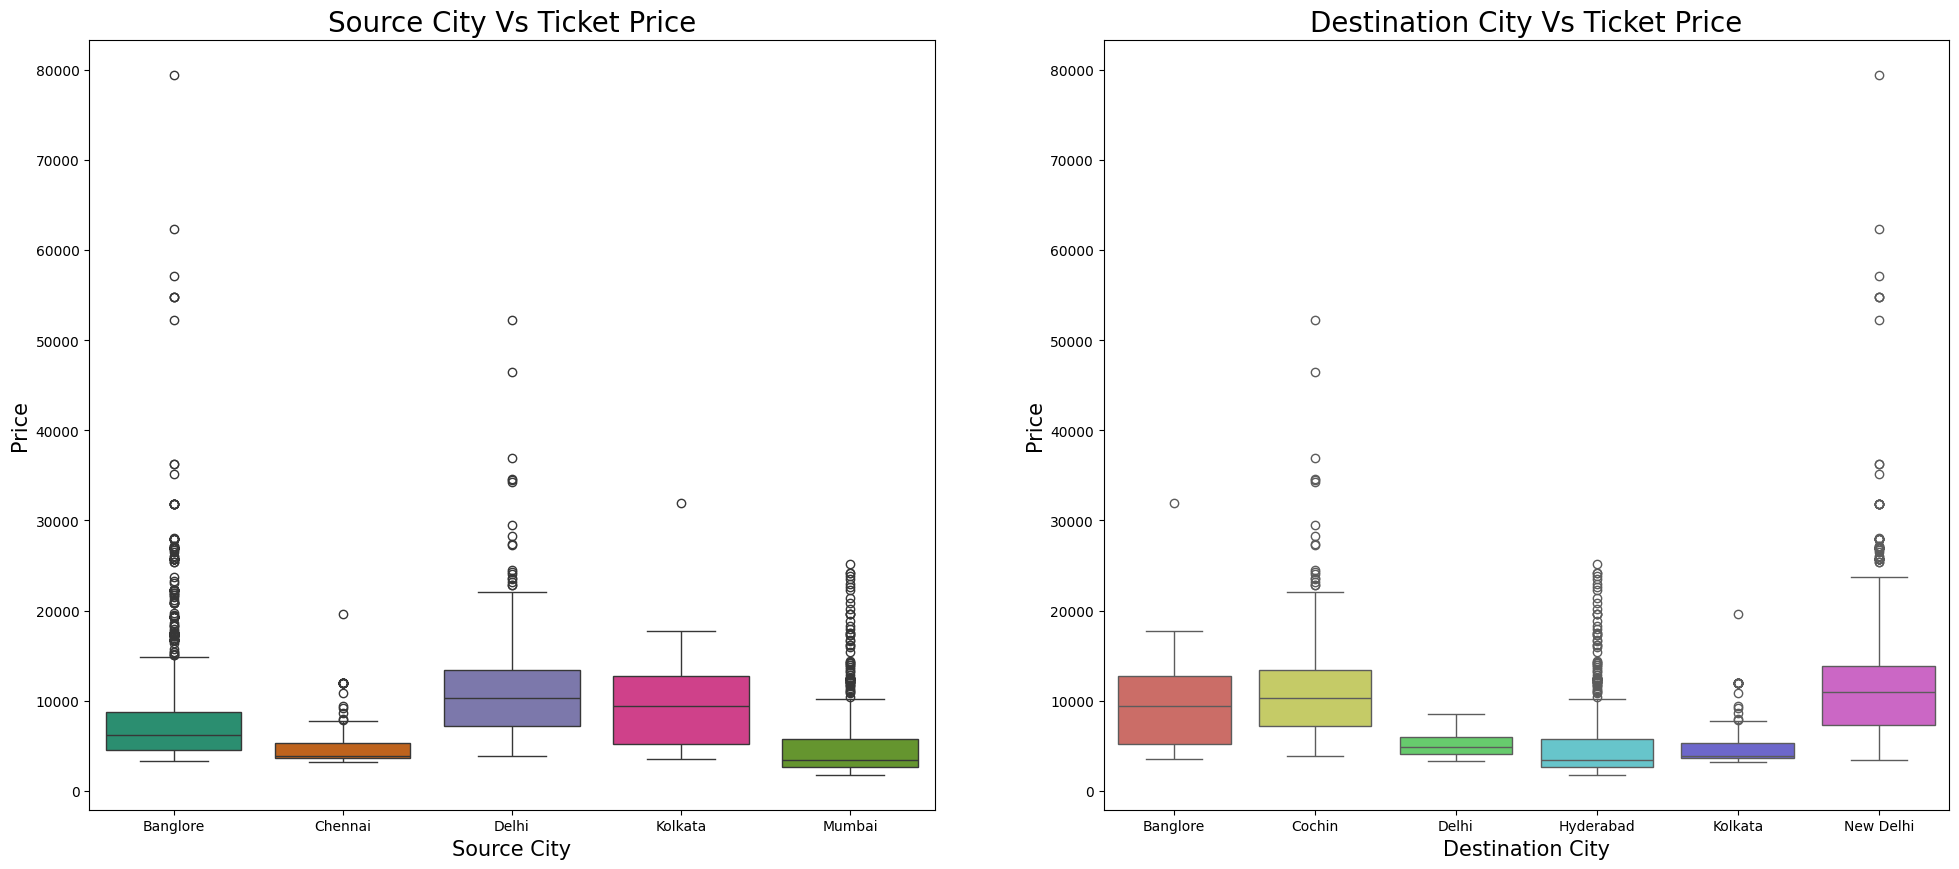

In [ ]:
plt.figure(figsize=(24,10))
plt.subplot(1,2,1)
sns.boxplot(x='Source',y='Price',data=df,palette='Dark2')
plt.title('Source City Vs Ticket Price',fontsize=20,)
plt.xlabel('Source City',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.subplot(1,2,2)
sns.boxplot(x='Destination',y='Price',data=df,palette='hls')
plt.title('Destination City Vs Ticket Price',fontsize=20)
plt.xlabel('Destination City',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

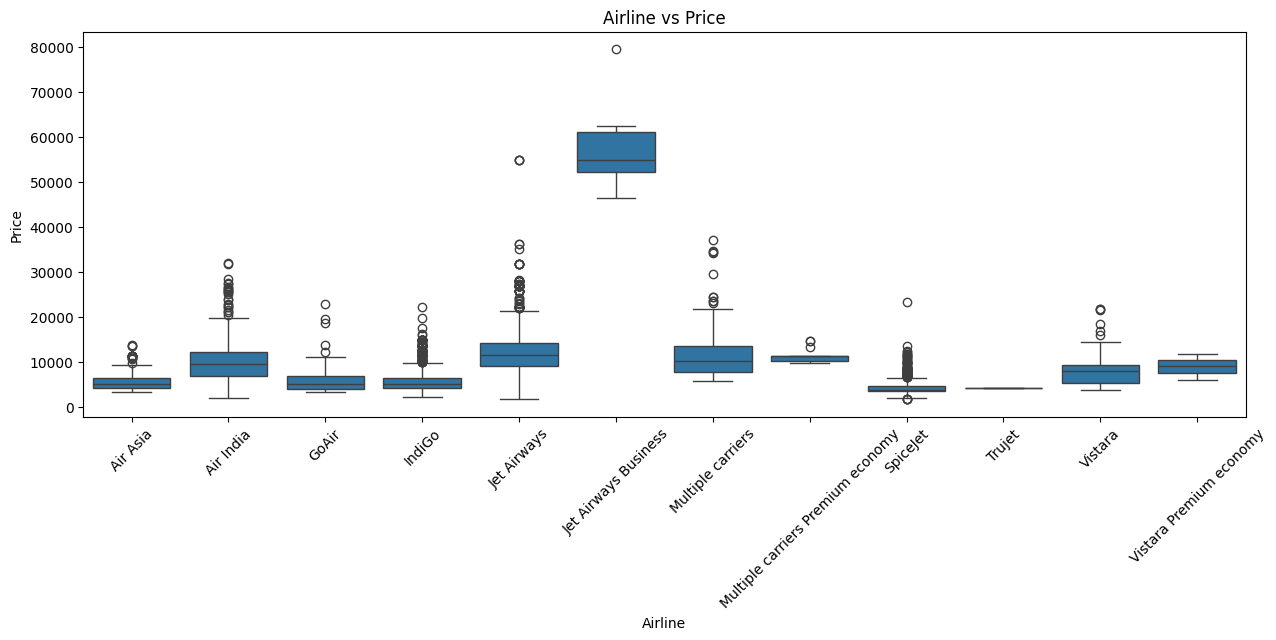

In [ ]:
plt.figure(figsize=(15,5))
sns.boxplot(x = df['Airline'], y=df['Price'])
plt.title('Airline vs Price')
plt.xlabel('Airline')
plt.xticks(rotation=45)
plt.ylabel('Price')
plt.show()

Jet Airways Business has more price range. spice jet tickets are cheap compare to others

In [ ]:
airlie_price = df.groupby(by=df['Airline'])['Price'].agg(['min','max','mean']).reset_index().sort_values(by='min')
airlie_price

,Airline,min,max,mean
8,SpiceJet,1759,23267,4338.284841
4,Jet Airways,1840,54826,11643.923357
1,Air India,2050,31945,9612.427756
3,IndiGo,2227,22153,5673.682903
0,Air Asia,3383,13774,5590.260188
2,GoAir,3398,22794,5861.056701
10,Vistara,3687,21730,7796.348643
9,Trujet,4140,4140,4140.000000
6,Multiple carriers,5797,36983,10902.678094
11,Vistara Premium economy,5969,11793,8962.333333


Spicejet is less expensive whereas Jet Airways Business is more expensive. Jet Airways and Air India are priced similarly.

In [ ]:
def get_dept_time(hour):
    if 0 <= hour < 6:
        return 'Early Morning'
    elif 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 16:
        return 'Afternoon'
    elif 16 <= hour < 20:
        return 'Evening'
    elif 20 <= hour < 24:
        return 'Night'
    else:
        return 'Invalid hour'

dt = df['Dep_Time'].apply(lambda x: int(x.split(':')[0])).apply(get_dept_time)


In [ ]:
def get_arrival_time(hour):
    hour = int(hour)
    if 0 <= hour < 6:
        return 'Early Morning'
    elif 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 16:
        return 'Afternoon'
    elif 16 <= hour < 20:
        return 'Evening'
    elif 20 <= hour < 24:
        return 'Night'
    else:
        return 'Invalid hour'
# at = df['arrival_time'].dt.hour.apply(get_arrival_time).rename('arrival_time')
at = df['Arrival_Time'].str.split(':').str.get(0).apply(get_arrival_time).rename('arrival_time')

In [ ]:
temp_df = pd.concat([df[['Source','Airline','Destination','Price']],dt,at] , axis=1)

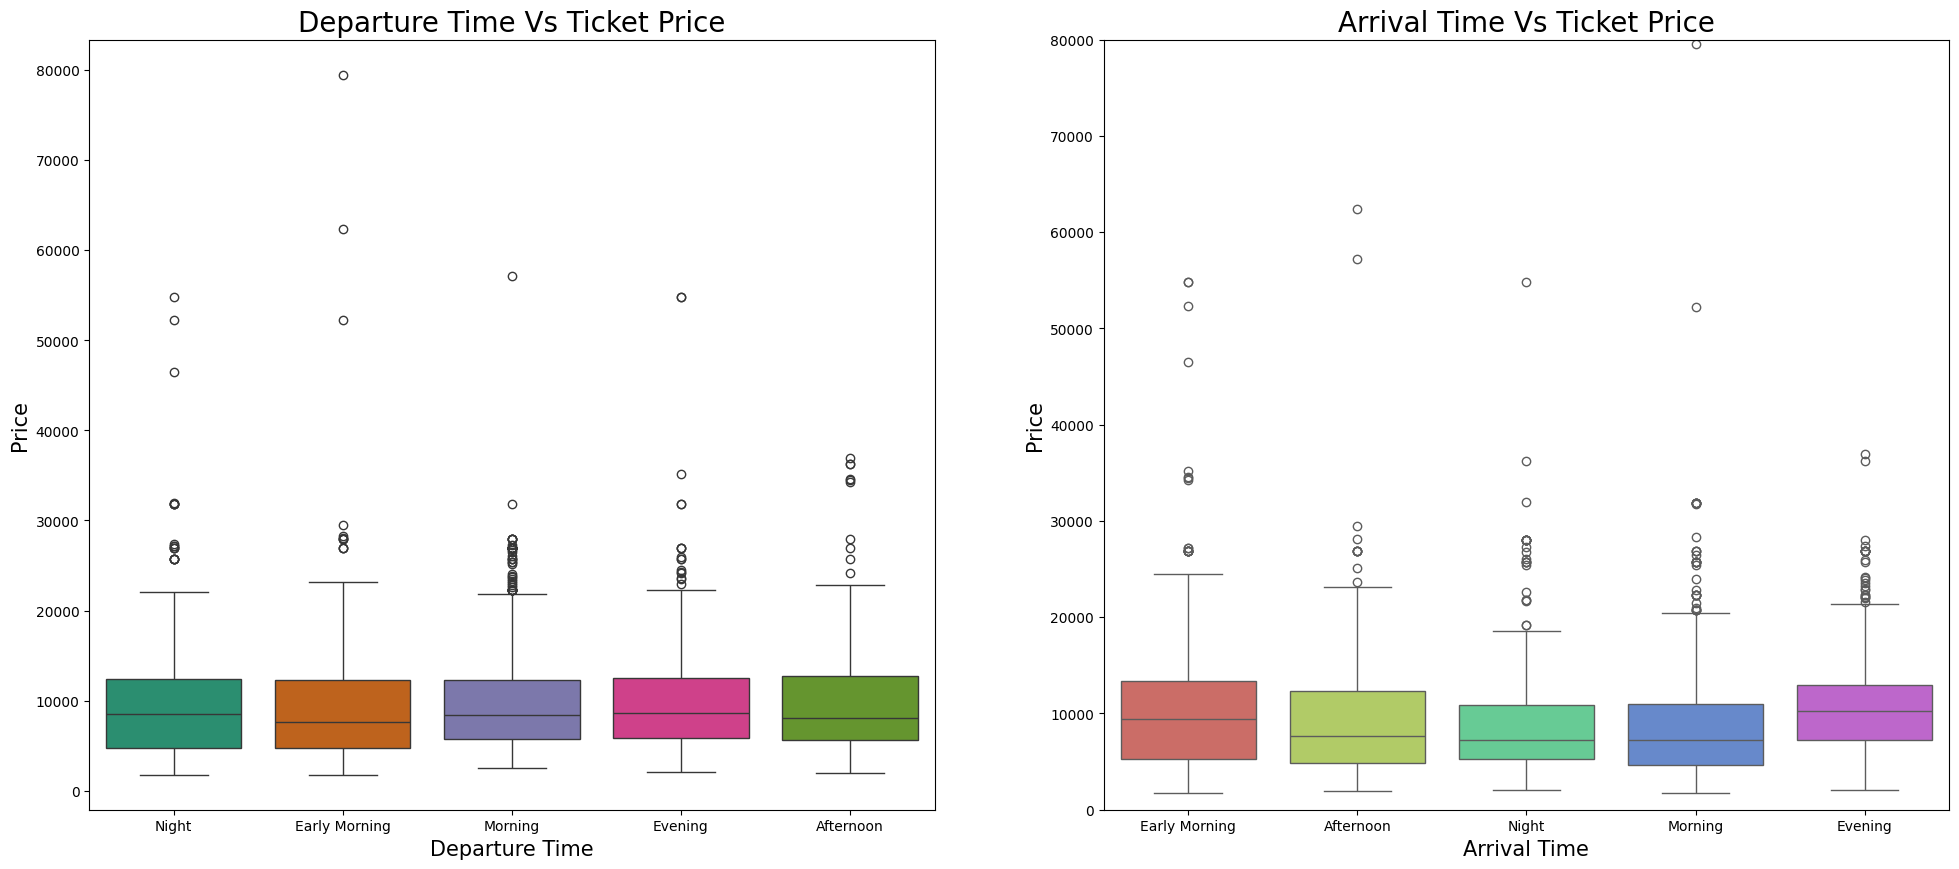

In [ ]:
plt.figure(figsize=(24,10))
plt.subplot(1,2,1)
sns.boxplot(x='Dep_Time',y='Price',data=temp_df,palette='Dark2')
plt.title('Departure Time Vs Ticket Price',fontsize=20)
plt.xlabel('Departure Time',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.subplot(1,2,2)
plt.ylim(0, 80000,2000)
sns.boxplot(x='arrival_time',y='Price',data=temp_df,palette='hls')
plt.title('Arrival Time Vs Ticket Price',fontsize=20)
plt.xlabel('Arrival Time',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

There is no large effect of departure time on price.

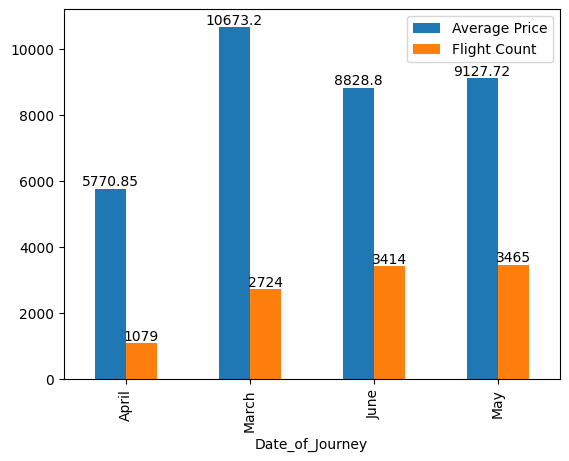

In [ ]:
ax = df.groupby(by =  df['Date_of_Journey'].astype('datetime64[ns]').dt.strftime('%B'))['Price'].agg(['mean','count']).sort_values(by='count').plot.bar()
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.legend(['Average Price', 'Flight Count'], loc='upper right')



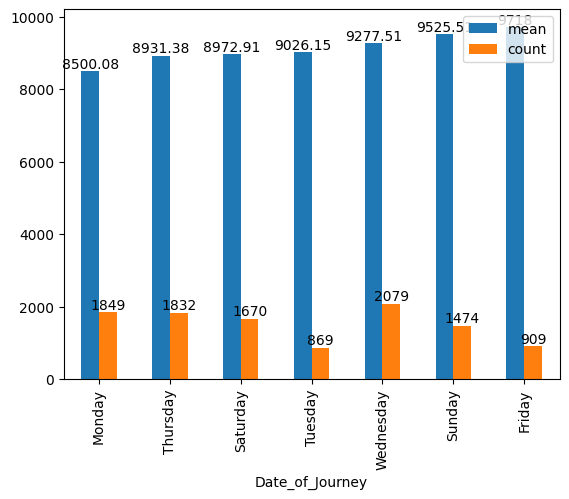

In [ ]:
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
temp = df['Date_of_Journey'].astype('datetime64[ns]')
ax =df.groupby(by =  df['Date_of_Journey'].astype('datetime64[ns]').dt.strftime('%A'))['Price'].agg(['mean','count']).sort_values(by='mean').plot.bar()
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.show()



on Friday and sunday ,more travelling happens.

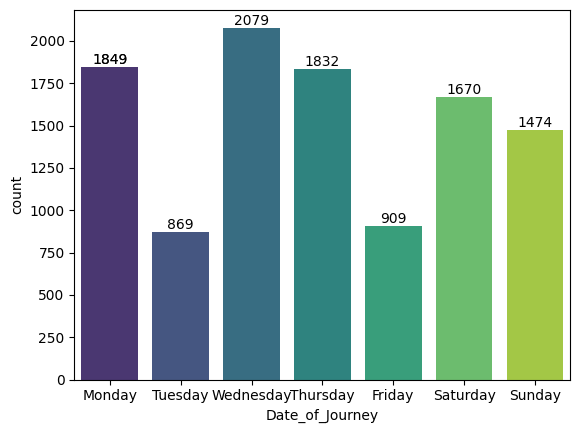

In [ ]:
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
temp = df['Date_of_Journey'].astype('datetime64[ns]')
ax=sns.countplot(x=temp.dt.strftime('%A'), data=df, palette='viridis' ,order=temp.dt.strftime('%A').value_counts().reindex(days_order).index)
ax.bar_label(ax.containers[0])
for i in range(len(ax.containers)):
  ax.bar_label(ax.containers[i])
plt.show()

Total stop vs price


In [ ]:
fig = px.bar(x=df['Total_Stops'].value_counts().index,y=df['Total_Stops'].value_counts().values,color=df['Total_Stops'].value_counts().index
             ,text = df['Total_Stops'].value_counts().values)
fig.update_traces(texttemplate="%{text}", textposition='outside')
fig.update_layout(
    width=800,   # Set the width of the plot
    height=500,  # Set the height of the plot
)

Large number of flights take one stop inbetween.

In [ ]:
temp = df.groupby(by=df['Total_Stops'])['Price'].agg(['mean']).sort_values(by='mean').reset_index().rename(columns={'mean':'Average Price'}  )
fig = px.bar(x=temp['Total_Stops'],y=temp['Average Price'],color=temp['Total_Stops'],text=temp['Average Price'])
fig.update_traces(texttemplate="%{text:.2f}", textposition='outside')
fig.update_layout(width=800,height=500,xaxis_title='Total Number of Stops',
    yaxis_title='Average Price',
    title='Total Stops Vs. price'
)


more stops indicates more price

In [ ]:
path = '/content/drive/MyDrive/Github Project/Project/Airline Fare  Prediction/Data_Train_clean.xlsx'
df.to_excel(path,index=False)